In [1]:
import pandas as pd 
import process
import numpy as np 

# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.fillna(0) # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

In [27]:
df_cleaned.shape

(695, 5279)

In [28]:
import warnings 


warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

lookback_window_0 = [0, 50]
number_of_clusters = 3
sigma = 10e-1
clustering_method = 'SPONGE_sym' 
number_of_repetition = 20
evaluation_window = 5
eta=0.01

overall_return, PnL, portfolio_value, sharpe_ratio = process.sliding_window(df_cleaned=df_cleaned, lookback_window_0=lookback_window_0, number_of_clusters=number_of_clusters, sigma=sigma, clustering_method=clustering_method, number_of_repetition=number_of_repetition, evaluation_window=evaluation_window, eta=eta)


0.9959707416892172
step 1
0.9999987063887833
step 2
1.0019543362918948
step 3
1.004440225464017
step 4
1.0013219658271326
step 5
1.0096944463472748
step 6
1.0152616070863256
step 7
1.0190190907941716
step 8
1.0190771752235317
step 9
1.0175087915078762
step 10
1.0193313477325021
step 11
1.0208914195801684
step 12
0.9919979316481555
step 13
0.9958391653349535
step 14
0.9137664557376556
step 15
0.8868992847207625
step 16
0.9131484646599762
step 17
0.9355111592617515
step 18
0.9575001311685055
step 19
0.9433260746921796
step 20
0.9409136389858095
step 21
0.9344866149570425
step 22
0.9356806037473328
step 23
0.9216436029200344
step 24


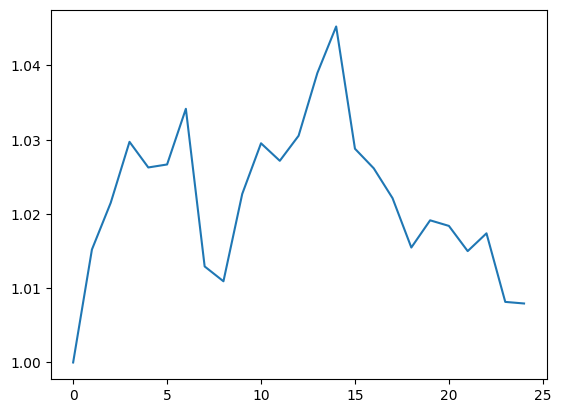

In [26]:
import matplotlib.pyplot as plt

plt.plot(portfolio_value)

In [20]:
n = len(PnL)//evaluation_window

for j in range(1, n):
    for i in range(1, evaluation_window+1):
        PnL[j*evaluation_window + i - 1] = PnL[j*evaluation_window + i - 1] + PnL[j*evaluation_window - 1]

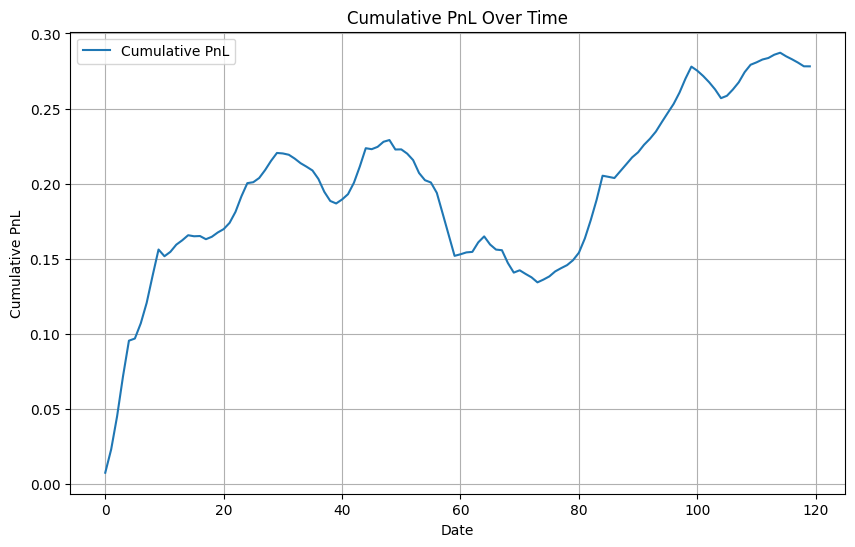

In [6]:
import matplotlib.pyplot as plt


# Tracez le PnL cumulatif
plt.figure(figsize=(10, 6))
plt.plot(PnL.cumsum(), label='Cumulative PnL')
plt.title('Cumulative PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.legend()
plt.grid(True)
plt.show()

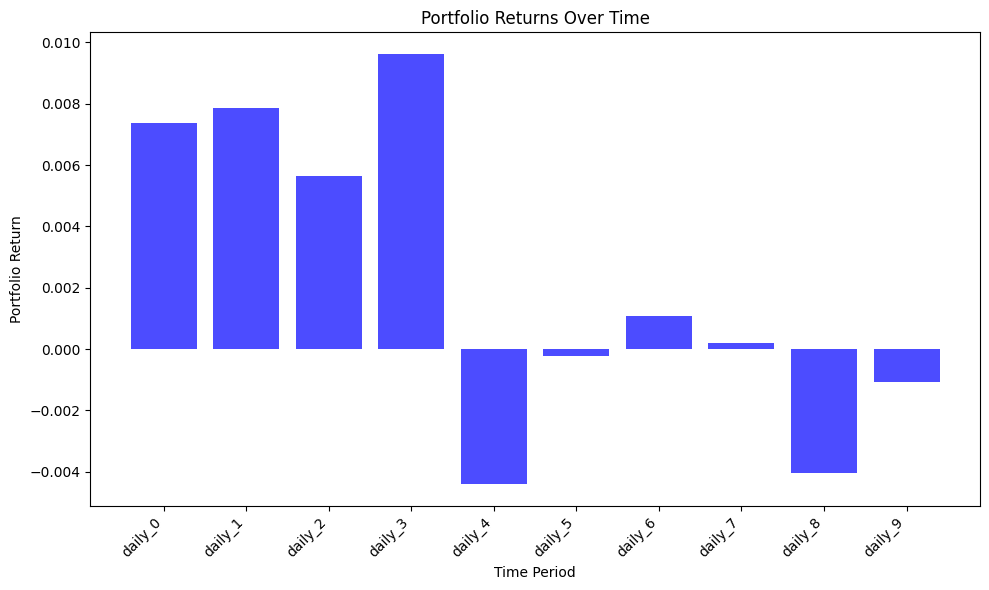

In [8]:
process.bar_plot_PnL(PnL)


In [ ]:
import warnings

################## PARAMETERS #################################################################
lookback_window = [0, 250]
number_of_clusters = 20
sigma = 10e-1
clustering_method = 'signed_laplacian' 
number_of_repetition = 10
evaluation_window = 10
eta=0.01
###############################################################################################

warnings.filterwarnings('ignore')

PnL = []
overall_return = pd.DataFrame()
portfolio_value =[1]

consolidated_W_1 = process.consolidated_W(number_of_repetitions=number_of_repetition, lookback_window=lookback_window, df_cleaned=df_cleaned, number_of_clusters=number_of_clusters, sigma=sigma, evaluation_window=evaluation_window, eta=eta)
portoflio_return_1 = process.portfolio_returns(evaluation_window=evaluation_window, df_cleaned=df_cleaned, lookback_window=lookback_window, consolidated_W=consolidated_W_1)

lookback_window_1 = [lookback_window[0] + evaluation_window, lookback_window[1] + evaluation_window]

consolidated_W_2 = process.consolidated_W(number_of_repetitions=number_of_repetition, lookback_window=lookback_window_1, df_cleaned=df_cleaned, number_of_clusters=number_of_clusters, sigma=sigma, evaluation_window=evaluation_window, eta=eta)
portoflio_return_2 = process.portfolio_returns(evaluation_window=evaluation_window, df_cleaned=df_cleaned, lookback_window=lookback_window_1, consolidated_W=consolidated_W_2)

overall_return_2 = pd.concat([portoflio_return_1, portoflio_return_2])